In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import sklearn
from sklearn import preprocessing

In [2]:
pd.options.mode.chained_assignment = None

База данных была взята из: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

Сначала необходимо прочитать данные из csv и преобразовать дату из строкового формата в формат даты

In [3]:
df = pd.read_csv('weatherAUS.csv')
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Посмотрим, сколько нулевых значений в нашем датасете

In [4]:
print(pd.isnull(df).sum())

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


Так как мы будем исследовать наш датасет относительно RainTomorrow, необходимо удалить все его неопределенные значения

In [5]:
df = df.dropna(subset=['RainToday'])
df = df.dropna(subset=['RainTomorrow'])
print(pd.isnull(df['RainTomorrow']).sum())

0


Визуализируем некоторые зависимости:

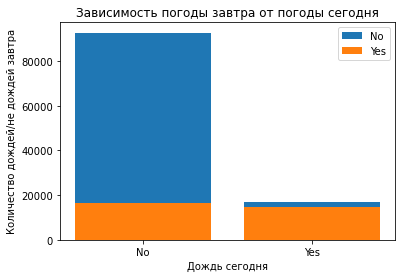

In [6]:
plt.title("Зависимость погоды завтра от погоды сегодня")
plt.xlabel("Дождь сегодня")
plt.ylabel("Количество дождей/не дождей завтра")
plt.bar(['No', 'Yes'], [len(df[(df['RainToday'] == 'No') & (df['RainTomorrow'] == 'No')]), len(df[(df['RainToday'] == 'Yes') & (df['RainTomorrow'] == 'No')])], label='No')
plt.bar(['No', 'Yes'], [len(df[(df['RainToday'] == 'No') & (df['RainTomorrow'] == 'Yes')]), len(df[(df['RainToday'] == 'Yes') & (df['RainTomorrow'] == 'Yes')])], label='Yes')
plt.legend()

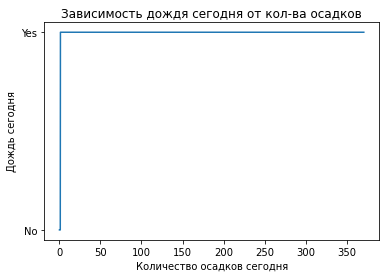

In [7]:
plt.title("Зависимость дождя сегодня от кол-ва осадков")
plt.xlabel("Количество осадков сегодня")
plt.ylabel("Дождь сегодня")
df_tmp = df.sort_values(by=['Rainfall'])
plt.plot(df_tmp['Rainfall'], df_tmp['RainToday'])

Как видно, RainToday = 'Yes', если Rainfall >= 1, так что мы можем удалить столбец RainToday

In [8]:
df = df.drop(['RainToday'], axis=1)

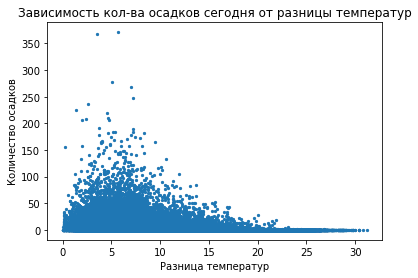

In [9]:
plt.title("Зависимость кол-ва осадков сегодня от разницы температур")
plt.xlabel("Разница температур")
plt.ylabel("Количество осадков")
df_tmp = df.dropna(subset=['MinTemp', 'MaxTemp'])
df_tmp['TempDiff'] = abs(df_tmp['MaxTemp'].values - df_tmp['MinTemp'].values)
df_tmp = df_tmp.sort_values(by=['TempDiff'])
plt.scatter(df_tmp['TempDiff'], df_tmp['Rainfall'], s=5)

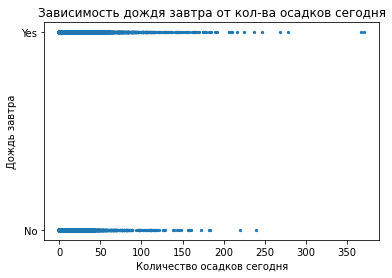

In [10]:
plt.title("Зависимость дождя завтра от кол-ва осадков сегодня")
plt.xlabel("Количество осадков сегодня")
plt.ylabel("Дождь завтра")
df_tmp = df.sort_values(by=['Rainfall'])
plt.scatter(df_tmp['Rainfall'], df_tmp['RainTomorrow'], s=5)

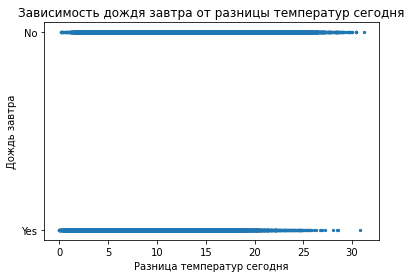

In [11]:
plt.title("Зависимость дождя завтра от разницы температур сегодня")
plt.xlabel("Разница температур сегодня")
plt.ylabel("Дождь завтра")
df_tmp = df.dropna(subset=['MinTemp', 'MaxTemp'])
df_tmp['TempDiff'] = abs(df_tmp['MaxTemp'].values - df_tmp['MinTemp'].values)
df_tmp = df_tmp.sort_values(by=['TempDiff'])
plt.scatter(df_tmp['TempDiff'], df_tmp['RainTomorrow'], s=5)

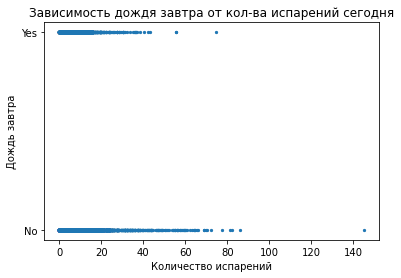

In [12]:
plt.title("Зависимость дождя завтра от кол-ва испарений сегодня")
plt.xlabel("Количество испарений")
plt.ylabel("Дождь завтра")
df_tmp = df.dropna(subset=['Evaporation'])
df_tmp = df.sort_values(by=['Evaporation'])
plt.scatter(df_tmp['Evaporation'], df_tmp['RainTomorrow'], s=5)

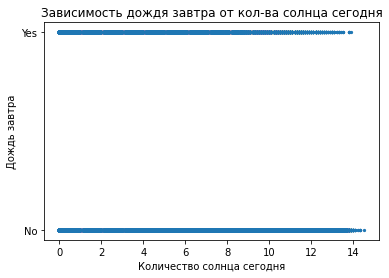

In [13]:
plt.title("Зависимость дождя завтра от кол-ва солнца сегодня")
plt.xlabel("Количество солнца сегодня")
plt.ylabel("Дождь завтра")
df_tmp = df.dropna(subset=['Sunshine'])
df_tmp = df.sort_values(by=['Sunshine'])
plt.scatter(df_tmp['Sunshine'], df_tmp['RainTomorrow'], s=5)

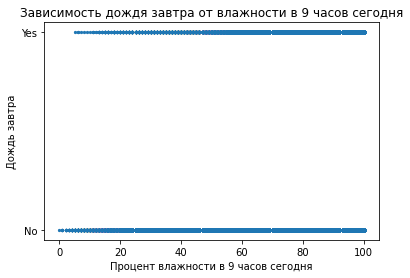

In [14]:
plt.title("Зависимость дождя завтра от влажности в 9 часов сегодня")
plt.xlabel("Процент влажности в 9 часов сегодня")
plt.ylabel("Дождь завтра")
df_tmp = df.dropna(subset=['Humidity9am'])
df_tmp = df.sort_values(by=['Humidity9am'])
plt.scatter(df_tmp['Humidity9am'], df_tmp['RainTomorrow'], s=5)

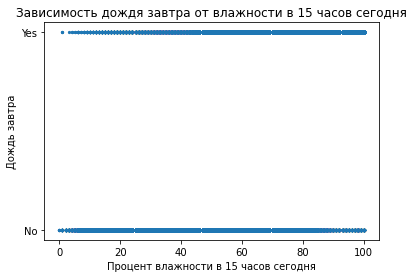

In [15]:
plt.title("Зависимость дождя завтра от влажности в 15 часов сегодня")
plt.xlabel("Процент влажности в 15 часов сегодня")
plt.ylabel("Дождь завтра")
df_tmp = df.dropna(subset=['Humidity3pm'])
df_tmp = df.sort_values(by=['Humidity3pm'])
plt.scatter(df_tmp['Humidity3pm'], df_tmp['RainTomorrow'], s=5)

Теперь необходимо заполнить нулевые значения в таблице, так как во многих столбцах их много, мы не можем их удалить.
Заполнять нулевые значения мы будем не одним числом, а для каждого значения высчитывать среднее значение именно в этом городе в этом месяце.
Благодаря этому мы получим более точные значения.

In [16]:
for col in df.columns:
    if col == 'Date' or col == 'Location' or col == 'RainTomorrow':
        continue
    if col == 'WindGustDir' or col == 'WindDir9am' or col == 'WindDir3pm':
        s = df[col].value_counts().idxmax()
        df[col] = df.groupby(['Date', 'Location'])[col].apply(lambda x:x.fillna(x.value_counts().idxmax() if x.value_counts().any() else s))
        continue
    m = df[col].mean()
    df[col] = df.groupby(['Date', 'Location'])[col].apply(lambda x:x.fillna(x.mean() if x.notnull().values.any() else m))

Воспользуемся LabelEncoder для того, чтобы заменить значения в столбцах RainTomorrow и Location

In [17]:
rain_encoder = preprocessing.LabelEncoder()
df['RainTomorrow'] = rain_encoder.fit_transform(df['RainTomorrow'])

In [18]:
loc_encoder = preprocessing.LabelEncoder()
df['Location'] = loc_encoder.fit_transform(df['Location'])

Воспользуемся OneHotEncoder для того, чтобы заменить значения в столбцах WindGustDir, WindDir9am и WindDir3pm. Однако делать мы будем это с помощью get_dummies, чтобы упростить работу с датасетом.

In [19]:
df = pd.get_dummies(df,prefix=['WindGustDir'], columns = ['WindGustDir'], drop_first=True)
df = pd.get_dummies(df,prefix=['WindDir9am'], columns = ['WindDir9am'], drop_first=True)
df = pd.get_dummies(df,prefix=['WindDir3pm'], columns = ['WindDir3pm'], drop_first=True)

Удалим столбец даты, так как он наиболее уникальный:

In [20]:
df = df.drop(['Date'], axis = 1)

А также сдвинем стобец RainTomorrow в правый конец для последующей работы с ним

In [21]:
fd = df['RainTomorrow']
df_tmp = df.dropna(subset=['Location'])
df = df.drop(['RainTomorrow'], axis=1)
df['RainTomorrow'] = fd

Выведем полученный датасет

In [22]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainTomorrow
0,2,13.4,22.9,0.6,5.472516,7.63054,44.0,20.0,24.0,71.0,...,0,0,0,0,0,0,0,1,0,0
1,2,7.4,25.1,0.0,5.472516,7.63054,44.0,4.0,22.0,44.0,...,0,0,0,0,0,0,0,0,1,0
2,2,12.9,25.7,0.0,5.472516,7.63054,46.0,19.0,26.0,38.0,...,0,0,0,0,0,0,0,0,1,0
3,2,9.2,28.0,0.0,5.472516,7.63054,24.0,11.0,9.0,45.0,...,0,0,0,0,0,0,0,0,0,0
4,2,17.5,32.3,1.0,5.472516,7.63054,41.0,7.0,20.0,82.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,41,3.5,21.8,0.0,5.472516,7.63054,31.0,15.0,13.0,59.0,...,0,0,0,0,0,0,0,0,0,0
145455,41,2.8,23.4,0.0,5.472516,7.63054,31.0,13.0,11.0,51.0,...,0,0,0,0,0,0,0,0,0,0
145456,41,3.6,25.3,0.0,5.472516,7.63054,22.0,13.0,9.0,56.0,...,0,0,0,0,0,0,0,0,0,0
145457,41,5.4,26.9,0.0,5.472516,7.63054,37.0,9.0,9.0,53.0,...,0,0,0,0,0,0,0,1,0,0


И сохраним его в новый файл

In [23]:
df.to_csv('weatherAfter.csv')